In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Path
path=r'/Users/kristenlehtinen/Documents/Careerfoundry/Instacart Basket Analysis'

In [4]:
# Import pickle file 
ords_prods_merge = pd.read_pickle(r'/Users/kristenlehtinen/Documents/Careerfoundry/Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_merge.pkl')

Text(0, 0.5, 'Number of Orders')

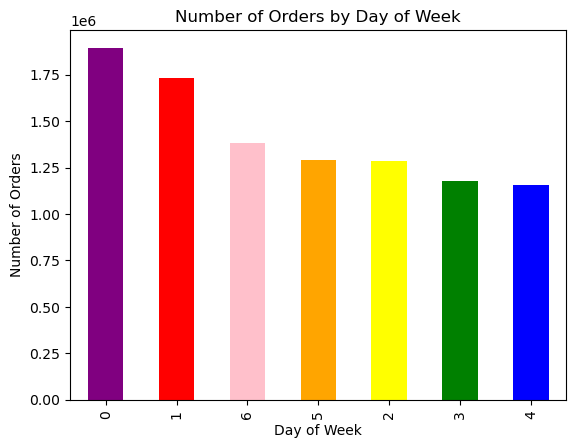

In [5]:
# Bar Chart
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
# Adding labels and title
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')

In [6]:
# Printing Frequencies
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    1894275
1    1730022
2    1286702
3    1176862
4    1156905
5    1291450
6    1382446
Name: count, dtype: int64

In [7]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

Text(0, 0.5, 'Frequency')

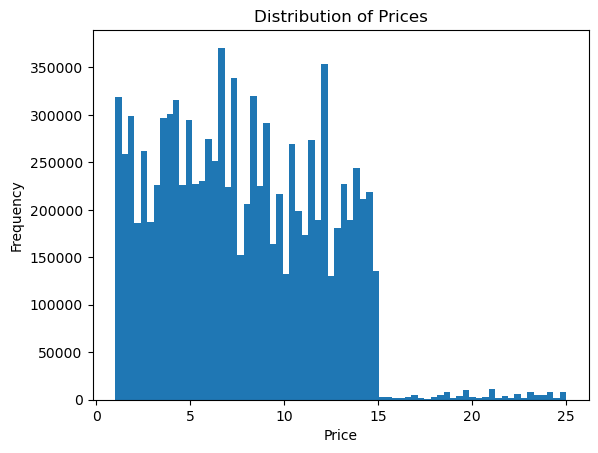

In [28]:
# Histogram
hist=ords_prods_merge['prices'].plot.hist(bins = 70)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [9]:
ords_prods_merge['prices'].describe()

count    9.917241e+06
mean     7.791105e+00
std      4.241683e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [10]:
ords_prods_merge['prices'].mean()

7.7911047639156985

In [11]:
ords_prods_merge['prices'].median()

7.4

In [12]:
# Checking max
ords_prods_merge['prices'].max()

25.0

<Axes: xlabel='prices', ylabel='prices'>

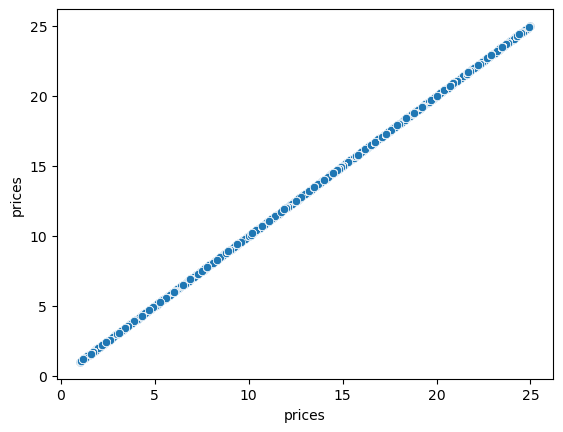

In [13]:
# Scatter plot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [14]:
# Checking for outlier
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,...,price_range_loc,busiest_day,Busiest days,busiest_hours,max_order,loyalty_flag,mean_product_price,spending flag,customer_type,Frequency flag


In [15]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [16]:
ords_prods_merge['prices'].max()

25.0

In [17]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_prices.png'))

In [18]:
# Create a list holding True/False values to the test np.random.rant()<=0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [19]:
dev

array([False,  True, False, ...,  True, False,  True])

In [20]:
np.random.rand(10)

array([0.2355201 , 0.83592942, 0.93246492, 0.85787609, 0.8494113 ,
       0.24799094, 0.18295764, 0.75329478, 0.86592852, 0.74138199])

In [21]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [22]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [23]:
len(ords_prods_merge)

9918662

In [24]:
len(big)+len(small)

9918662

In [25]:
df_2 = small[['orders_day_of_week','prices']]

/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


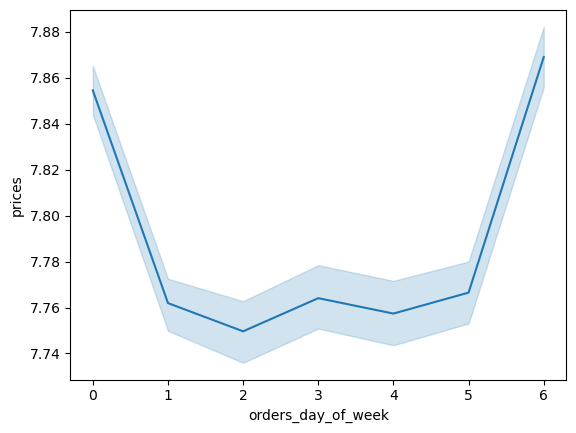

In [26]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [27]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_prices.png'))